## Video Game Sales

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
# step 1 - load the csv file
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [55]:
# get the info of the dataset
df.info()

#shape of the dataset
print("Shape of the dataframe: ", df.shape)

#calculate number of rows
print("Number of rows: ",df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Shape of the dataframe:  (16598, 11)
Number of rows:  16598


In [56]:
#find missing data in colums
print(df.columns)

for i in df.columns:
    num_rows = df[f"{i}"].count()
    
    if(num_rows != df.shape[0]):
        print(f"Column {i} has {df.shape[0] - num_rows }missing  values")

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
Column Year has 271missing  values
Column Publisher has 58missing  values


In [57]:
#smatter way to handle missing values
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [58]:
# drop rows with missing values, since we still need years to get the trends well
df=df.dropna()

df.shape



(16291, 11)

In [59]:
# rank by global sales, 

df.head(10)
# print(df.head(10))

top_10 = df.sort_values(by="Global_Sales",ascending=False).head(10)
print(top_10)

   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29

In [60]:

#publishr that has the most games in top 100
top_100= df.sort_values(by="Global_Sales",ascending=False).head(100)
#top_publisher = (top_100.groupby('Publisher')['Global_Sales'].mean()*100).round(2)
publisher_counts = top_100['Publisher'].value_counts()
print(publisher_counts)

Publisher
Nintendo                       52
Activision                     14
Take-Two Interactive            9
Sony Computer Entertainment     8
Microsoft Game Studios          6
Electronic Arts                 5
Ubisoft                         2
Bethesda Softworks              1
Sega                            1
SquareSoft                      1
Atari                           1
Name: count, dtype: int64


## Platform wars

In [61]:
# Platform with highest TOTAL sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum()

# Sort it
platform_sales_sorted = platform_sales.sort_values(ascending=False)

print(platform_sales_sorted.head(10))  # Top 10 platforms

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64


In [62]:
#which publisher dominates the top 100 by game count
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


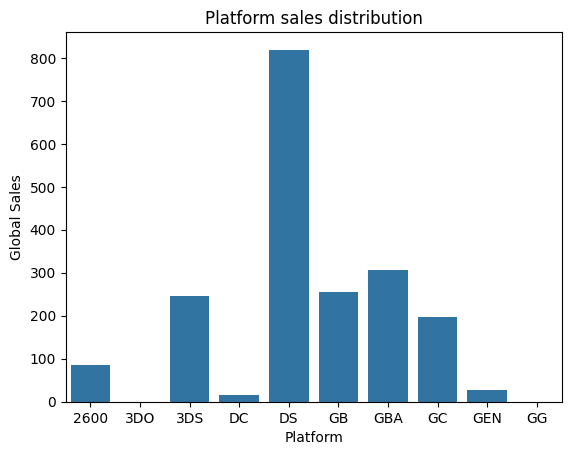

In [63]:
# Bar chart
sns.barplot(x="Platform",y="Global_Sales",data=platform_sales.head(10).to_frame())
plt.title("Platform sales distribution")
plt.ylabel("Global Sales")
plt.show()

## Regional Analysis

In [64]:
#Which region buys the most games? (NA, EU, JP, Other)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [65]:
region_sales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
print(region_sales)

region_sales_sorted = region_sales.sort_values(ascending=False)
top_region = region_sales.idxmax()
print("The region with the most game sales is:", top_region)


print("/n")
print(region_sales_sorted)





NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64
The region with the most game sales is: NA_Sales
/n
NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64


In [66]:
#Does Japan prefer different genres than North America?
genre_sales = df.groupby("Genre")[["NA_Sales","JP_Sales","EU_Sales"]].sum()

print(genre_sales)

genre_sales = genre_sales.sort_values(by="JP_Sales",ascending=False)
print(genre_sales)

              NA_Sales  JP_Sales  EU_Sales
Genre                                     
Action          861.77    158.65    516.48
Adventure       101.93     51.99     63.74
Fighting        220.74     87.15    100.00
Misc            396.92    106.67    211.77
Platform        445.99    130.65    200.65
Puzzle          122.01     56.68     50.52
Racing          356.93     56.61    236.31
Role-Playing    326.50    350.29    187.57
Shooter         575.16     38.18    310.45
Simulation      181.78     63.54    113.02
Sports          670.09    134.76    371.34
Strategy         67.83     49.10     44.84
              NA_Sales  JP_Sales  EU_Sales
Genre                                     
Role-Playing    326.50    350.29    187.57
Action          861.77    158.65    516.48
Sports          670.09    134.76    371.34
Platform        445.99    130.65    200.65
Misc            396.92    106.67    211.77
Fighting        220.74     87.15    100.00
Simulation      181.78     63.54    113.02
Puzzle     

<Axes: xlabel='Year', ylabel='Global_Sales'>

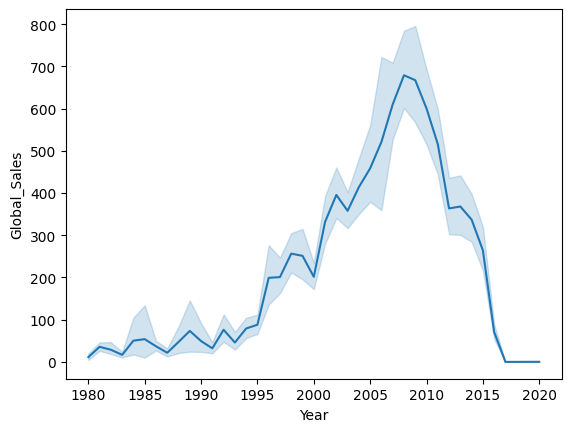

In [67]:
df.head()
sns.lineplot(data=df,x="Year",y="Global_Sales",estimator="sum")

<Axes: xlabel='Year', ylabel='Global_Sales'>

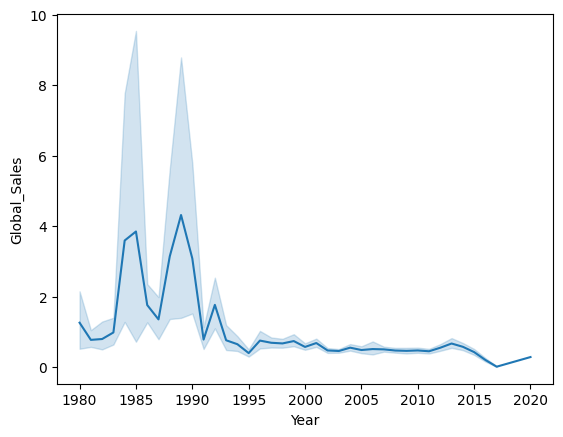

In [68]:
sns.lineplot(data=df,x="Year",y="Global_Sales",estimator="mean")

## Genre Breakdown

In [69]:
genre_sales = df.groupby("Genre")[["Global_Sales"]].sum()

#print(genre_sales)

genre_sales = genre_sales.sort_values(by="Global_Sales",ascending=False)
print(genre_sales)

              Global_Sales
Genre                     
Action             1722.84
Sports             1309.24
Shooter            1026.20
Role-Playing        923.83
Platform            829.13
Misc                789.87
Racing              726.76
Fighting            444.05
Simulation          389.98
Puzzle              242.21
Adventure           234.59
Strategy            173.27


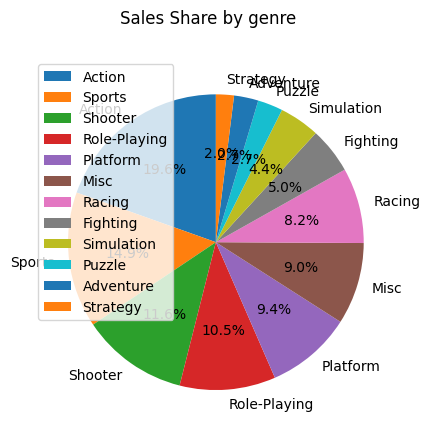

In [70]:
#seaborn doesnt have piechart
#Genre distribution (pie chart or bar)
sales_by_genre = genre_sales.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    title="Sales Share by genre",
    subplots=True,
)
plt.ylabel('')
plt.show()


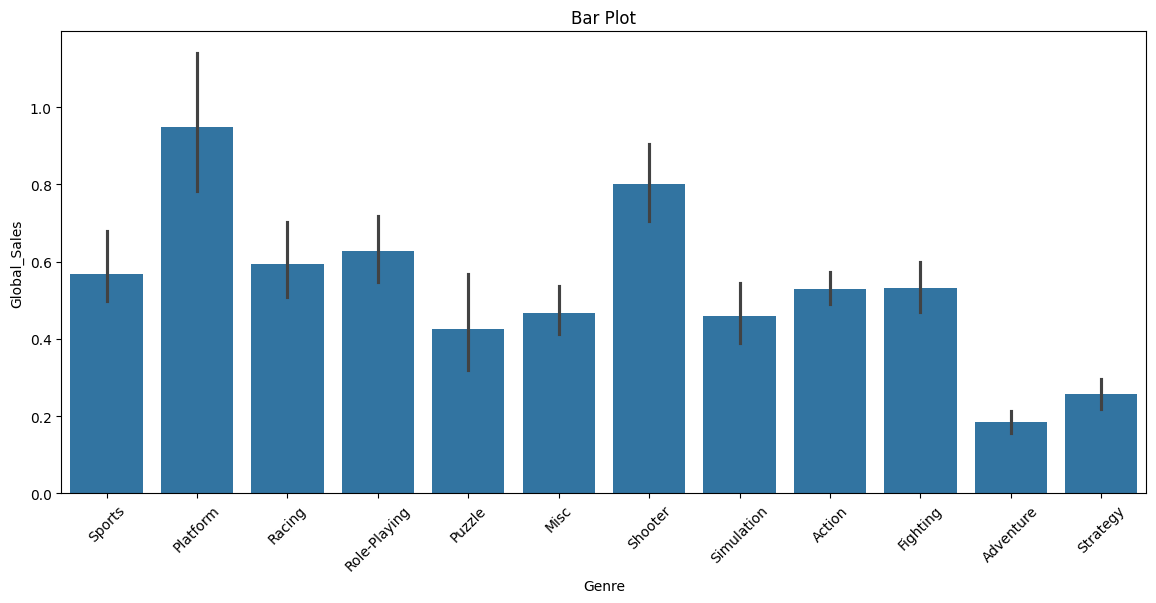

In [71]:
#bar chart always cleaner
plt.figure(figsize=(14,6))
sns.barplot(x="Genre",y="Global_Sales",data=df,estimator="mean")

plt.xticks(rotation=45)
plt.title("Bar Plot")
plt.show()

## Derived Metric

In [72]:
#global sales per game
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [74]:
global_sales_publisher = df.groupby('Publisher')["Global_Sales"].sum()

                            
global_sales_publisher = global_sales_publisher.sort_values(ascending=False)
print(global_sales_publisher)

Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
                                ...   
Genterprise                       0.01
Media Entertainment               0.01
Ascaron Entertainment             0.01
Commseed                          0.01
UIG Entertainment                 0.01
Name: Global_Sales, Length: 576, dtype: float64


In [81]:
#who is the most efficient publisher? (Highest avg sales per game)
global_sales_publisher_avg = (df.groupby("Publisher")["Global_Sales"].mean()).round(2)

global_sales_publisher_avg = global_sales_publisher_avg.sort_values(ascending=False)
print(global_sales_publisher_avg)


Publisher
Palcom                        4.17
Red Orb                       2.62
Nintendo                      2.56
Arena Entertainment           2.36
UEP Systems                   2.25
                              ... 
Interworks Unlimited, Inc.    0.01
Takuyo                        0.01
System Soft                   0.01
Boost On                      0.01
UIG Entertainment             0.01
Name: Global_Sales, Length: 576, dtype: float64
